In [104]:
import sympy
from sympy.abc import x, y, z
from sympy import re, im, I
import numpy as np
import matplotlib.pyplot as plt


In [105]:
%%latex
\begin{equation*}
\psi = U (r - \frac{R^{2}}{r}) sin\theta
\end{equation*}
U - постоянная, а на границе цилиндра, 
R - радиус цилиндра


<IPython.core.display.Latex object>

In [106]:
def cylinder_stream_function(U=1, R=1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

In [107]:
%%latex
\begin{equation*}
u = \frac{\partial \psi}{\partial y}   v =  − \frac{\partial \psi}{\partial x} 
\end{equation*}



<IPython.core.display.Latex object>

In [108]:
def velocity_field(psi):
    u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v

In [126]:
def plot_streamlines(ax, u, v, xlim=(-1, 1), ylim=(-1, 1)):
    x0, x1 = xlim
    y0, y1 = ylim
    Y, X =  np.ogrid[y0:y1:100j, x0:x1:100j]
    ax.streamplot(X, Y, u(X, Y), v(X, Y), color='cornflowerblue')
def format_axes(ax):
    ax.set_aspect('equal')
    ax.figure.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

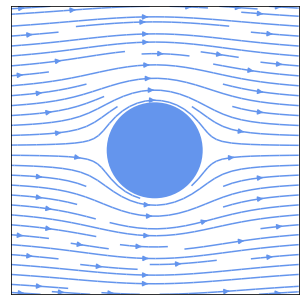

In [127]:
psi = cylinder_stream_function(U=1, R=1)
u, v = velocity_field(psi)

xlim = ylim = (-3, 3)
fig, ax = plt.subplots(figsize=(4, 4))
plot_streamlines(ax, u, v, xlim, ylim)

c = plt.Circle((0, 0), radius=1, facecolor='cornflowerblue')
ax.add_patch(c)

format_axes(ax)

In [128]:
"""Первая задача"""

'Первая задача'

In [141]:
def obstacle_stream_function(h=1):
    return (-2 * h**2 * y) / (4 * x**2 + 4**y**2) + y

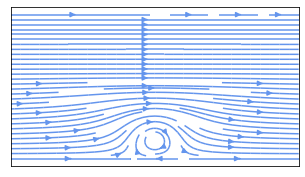

In [150]:
psi = obstacle_stream_function()
u, v = velocity_field(psi)

xlim = (-3, 3)
ylim = (0, 3)
fig, ax = plt.subplots(figsize=(4, 4))
plot_streamlines(ax, u, v, xlim, ylim)


format_axes(ax)